# Georice

Georice processor creates classified maps of the presence of rice fields based on Sentinel 1A and Sentinel 1B imagery. Classification script was creted by CNES.
Sentinel 1 scenes are acquired from [Sentinel-hub](https://www.sentinel-hub.com/). Processor can not be used without
specifying  of Sentinel hub credentials:
* client_id
* client_secret
* instance_id

Tutorial how to setup georice procesor can be found [here](./Georice_Setup.ipynb)

Import of Georice proccesor

In [1]:
from georice import Georice

Other libraries

In [2]:
import shapely.geometry
import IPython.display
from sentinelhub import BBox
import rasterio
import os
import matplotlib.pyplot as plt
from matplotlib import colors

In [3]:
sh_credentials = dict(sh_client_id='e41c5e66-d86b-49ac-90c2-be620fd09fd4',
                      sh_client_secret='[J*kkV/zYBJ-ZJcOh07jb+($6Apk,ddmj>Zjs%_X',
                      instance_id='c99541e0-93ff-44ab-a555-f557ea30610d')
paths = dict(rice_output='/home/jovyan/getting-started/GISAT/rice_output',
                      scn_output='/home/jovyan/getting-started/GISAT/rice_output')
task = Georice()
task.set_credentials(**sh_credentials)
task.set_config(**paths)

sh_client_id : e41c5e66-d86b-49ac-90c2-be620fd09fd4 was set into SHConfig
sh_client_secret : [J*kkV/zYBJ-ZJcOh07jb+($6Apk,ddmj>Zjs%_X was set into SHConfig
instance_id : c99541e0-93ff-44ab-a555-f557ea30610d was set into SHConfig


In [4]:
task = Georice()

Setting of Area of Interest and period:

In [5]:
bbox = 502105.6280661971541122, 1184410.5953210531733930, 520309.7550376804429106, 1197661.2870531221851707
epsg = 32648
name = 'ANPHU'
period = ('20180704', '20180804')

In [9]:
IPython.display.GeoJSON(BBox(bbox,crs=epsg).transform(4326).get_geojson())

<IPython.display.GeoJSON object>

Finding scense for given bbox and period from 20180704 to 20180804

In [7]:
task.find_scenes(bbox=bbox,
                 epsg=epsg,
                 period=period,
                 tile_name=name)

Lists of available Sentinel 1A and 1B scenes for given AOI and period

In [8]:
task.scenes

Total number of scenes 8 in period 2018-07-04T00:00:00 / 2018-08-04T00:00:00
No0: Satelite: S1A, polarization: VV, rel. orbit number: 026, orbit path: ASCENDING, img name: S1A_ANPHU_VV_ASC_026_20180730_txxxxxx.tif
No1: Satelite: S1A, polarization: VH, rel. orbit number: 026, orbit path: ASCENDING, img name: S1A_ANPHU_VH_ASC_026_20180730_txxxxxx.tif
No2: Satelite: S1B, polarization: VV, rel. orbit number: 018, orbit path: DESCENDING, img name: S1B_ANPHU_VV_DES_018_20180723_txxxxxx.tif
No3: Satelite: S1B, polarization: VH, rel. orbit number: 018, orbit path: DESCENDING, img name: S1B_ANPHU_VH_DES_018_20180723_txxxxxx.tif
No4: Satelite: S1A, polarization: VV, rel. orbit number: 018, orbit path: DESCENDING, img name: S1A_ANPHU_VV_DES_018_20180717_txxxxxx.tif
No5: Satelite: S1A, polarization: VH, rel. orbit number: 018, orbit path: DESCENDING, img name: S1A_ANPHU_VH_DES_018_20180717_txxxxxx.tif
No6: Satelite: S1B, polarization: VV, rel. orbit number: 018, orbit path: DESCENDING, img name: S

Download scenes from Sentinel Hub to folder

In [27]:
task.get_scenes()

Scenes were downoladed into /home/jovyan/getting-started/GISAT/rice_output


Showing of first scene

In [9]:
dataset = rasterio.open(os.path.join(task.config['scn_output'],'S1A_ANPHU_VV_ASC_026_20180730_txxxxxx.tif'))

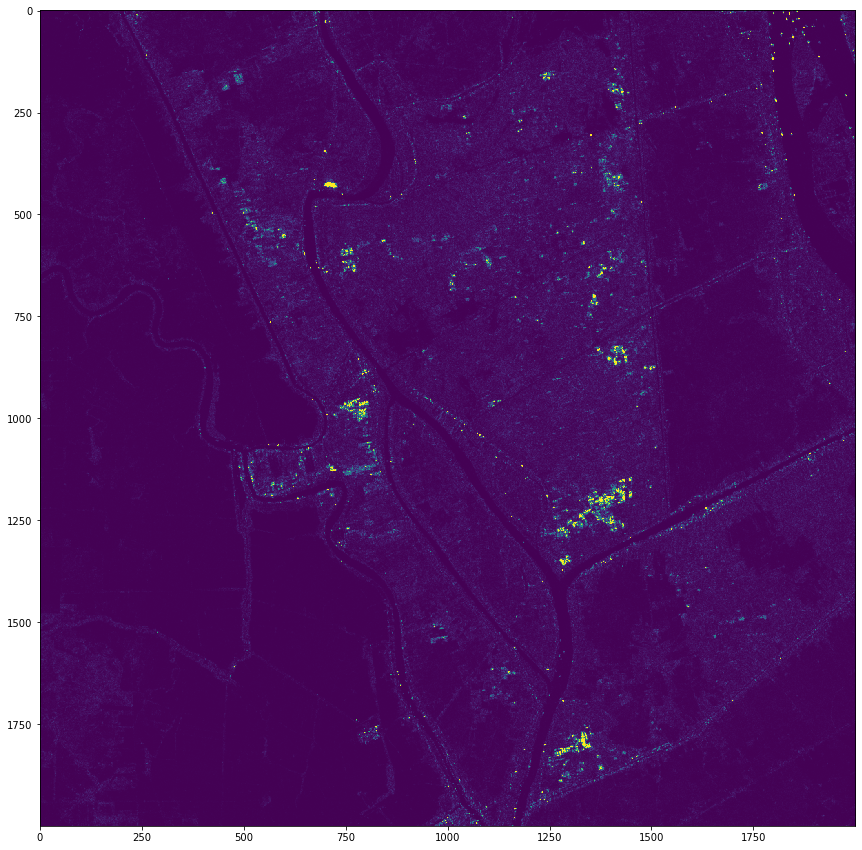

In [10]:
plt.figure(figsize=(15,15))
plt.imshow(dataset.read(1))

Generating of rice map

In [30]:
help(Georice.ricemap_get)

Help on function ricemap_get in module georice:

ricemap_get(self, orbit_number, period, direct, inter=False, lzw=False, mask=False, nr=False, delete=True)
     Georie - generation of classified rice map
    "no_data":0, "rice":1, "urban_tree":2, "water":3, "other":4
    
    Generete rice maps for given parameters of orbit number, orbit path and period and save them
    into rice_output path defined.
    orbit_number - orbit number; type: str; - three digits string representation i.e. '018'
    period - starting_date / ending_date => YYYYMMDD, type: tuple('str','str')
    direct - orbit direction; type: str; values ASC - ascending, DES - descending; default = 'DES'
    inter - save intermediate products (min/max/mean/max_increase); type: bool; default = False
    lzv - use LZW compression; type: bool; default = False i.e. DEFLATE
    mask - generate and write rice, trees, water, other and nodata masks; type: bool; default = False
    nr - diable automatic reprojection to EPSG:4326, ty

In [31]:
task.ricemap_get('018', period , 'DES')

Ricemap saved into folder: /home/jovyan/getting-started/GISAT/rice_output


In [19]:
ricemap = rasterio.open(os.path.join(task.config['rice_output'],name,'ricemap_ANPHU_DES_018_20180704_20180804.tif'))

In [20]:
cmap = colors.ListedColormap(['white','yellow','green','blue','red'])
bounds=[0,1,2,3,4]
norm = colors.BoundaryNorm(bounds, cmap.N)

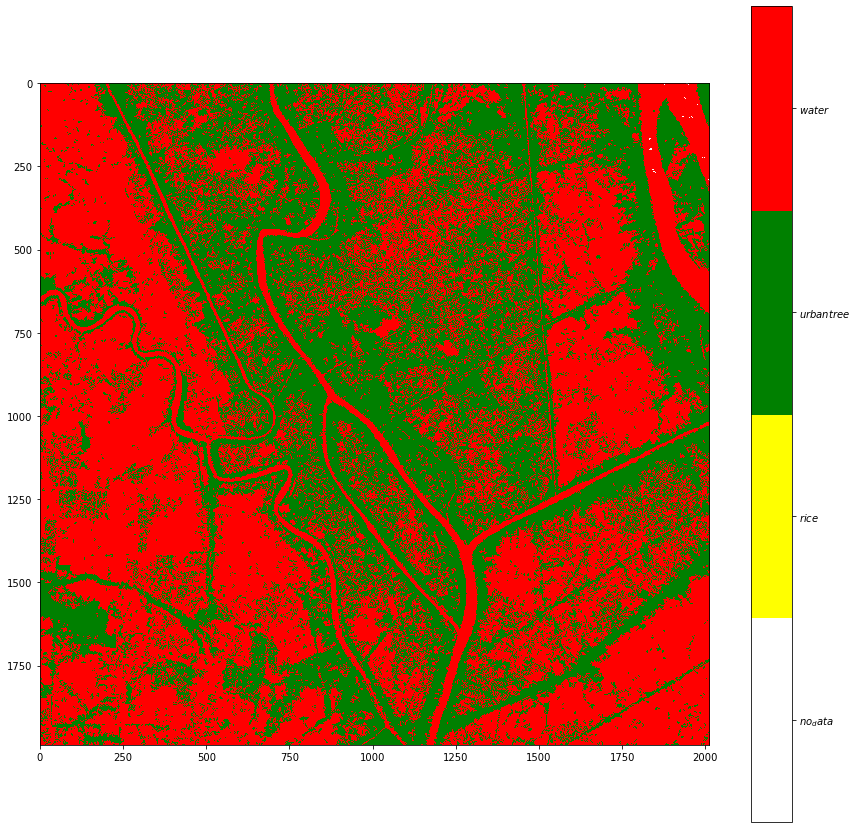

In [23]:
plt.figure(figsize=(15,15))
riceimg  = plt.imshow(ricemap.read(1), cmap=cmap, norm=norm)
cbar = plt.colorbar(cmap=cmap, norm=norm, boundaries=bounds)
cbar.set_ticks([0.5, 1.5, 2.5, 3.5, 4.5])

cbar.set_ticklabels(['$no_data$','$rice$','$urban tree$','$water$', '$other$'])

Clear scene folder

In [24]:
task.delete_scenes()